# Mac Address Feature Correlations

The notebook aims at understanding the mac addresses using a clustering algorithm (k-means) to determine whether the mac addresses are stationary or moving (shoppers).

## Load dependencies

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
matplotlib.style.use('ggplot')

import seaborn as sns

In [2]:
%load_ext autoreload
%autoreload 2

In [4]:
from msci.utils import utils

## Import data

In [5]:
mac_address_df = utils.import_mac_addresses()

In [6]:
print('{} mac addresses with {} features'.format(mac_address_df.shape[0], mac_address_df.shape[1]))

154152 mac addresses with 18 features


## Investigation

### Overview of the features

In [7]:
mac_address_df.describe()

,frequency,radius_of_gyration,count_density_variance,length_of_stay,is_out_of_hours,av_speed,av_turning_angle,total_turning_angle,av_turning_angle_velocity,av_path_length,total_path_length,av_straightness,av_speed_from_total,turning_angle_density
count,154152.000000,154152.000000,51030.000000,154152.000000,154152.000000,71306.000000,49450.000000,51823.000000,40612.000000,71306.000000,71306.000000,51018.000000,71306.000000,51337.000000
mean,15.359022,17.961114,1.492829,3582.182028,0.008803,1.121845,1.700199,65.534381,-0.022307,37.954582,581.774213,2.502220,0.560941,0.066053
std,84.925714,29.686701,1.473297,10723.404720,0.093411,2.076115,0.693469,263.058463,0.693991,43.376093,1695.902676,2.604597,1.493512,0.063205
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.141593,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.403179,0.000000,0.000000,0.190801,1.340246,3.132352,-0.104617,12.184685,32.449961,1.453370,0.057198,0.021546
50%,1.000000,0.000000,1.112697,0.000000,0.000000,0.515376,1.673878,10.271021,-0.000076,22.472495,135.479689,2.061950,0.188619,0.047781
75%,4.000000,25.044960,2.288689,446.000000,0.000000,1.092085,2.074802,38.687829,0.098000,46.016529,562.479607,2.860446,0.436926,0.090130
max,4344.000000,168.500000,15.556349,86335.000000,1.000000,95.081544,3.141593,8561.045646,3.141593,337.000000,138837.554597,224.111577,95.081544,0.942478


In [17]:
mac_address_clean_df = mac_address_df[mac_address_df.frequency > 10]
mac_address_clean_df = mac_address_clean_df.replace([np.inf, -np.inf], np.nan)
mac_address_clean_df = mac_address_clean_df.dropna()

In [22]:
FEATURE_LIST = [
    'length_of_stay',
    'radius_of_gyration',
    'count_density_variance',
    'av_speed',
    'av_turning_angle',
    'av_turning_angle_velocity',
    'av_path_length',
    'av_straightness',
    'turning_angle_density',
]

### Correlation Plots

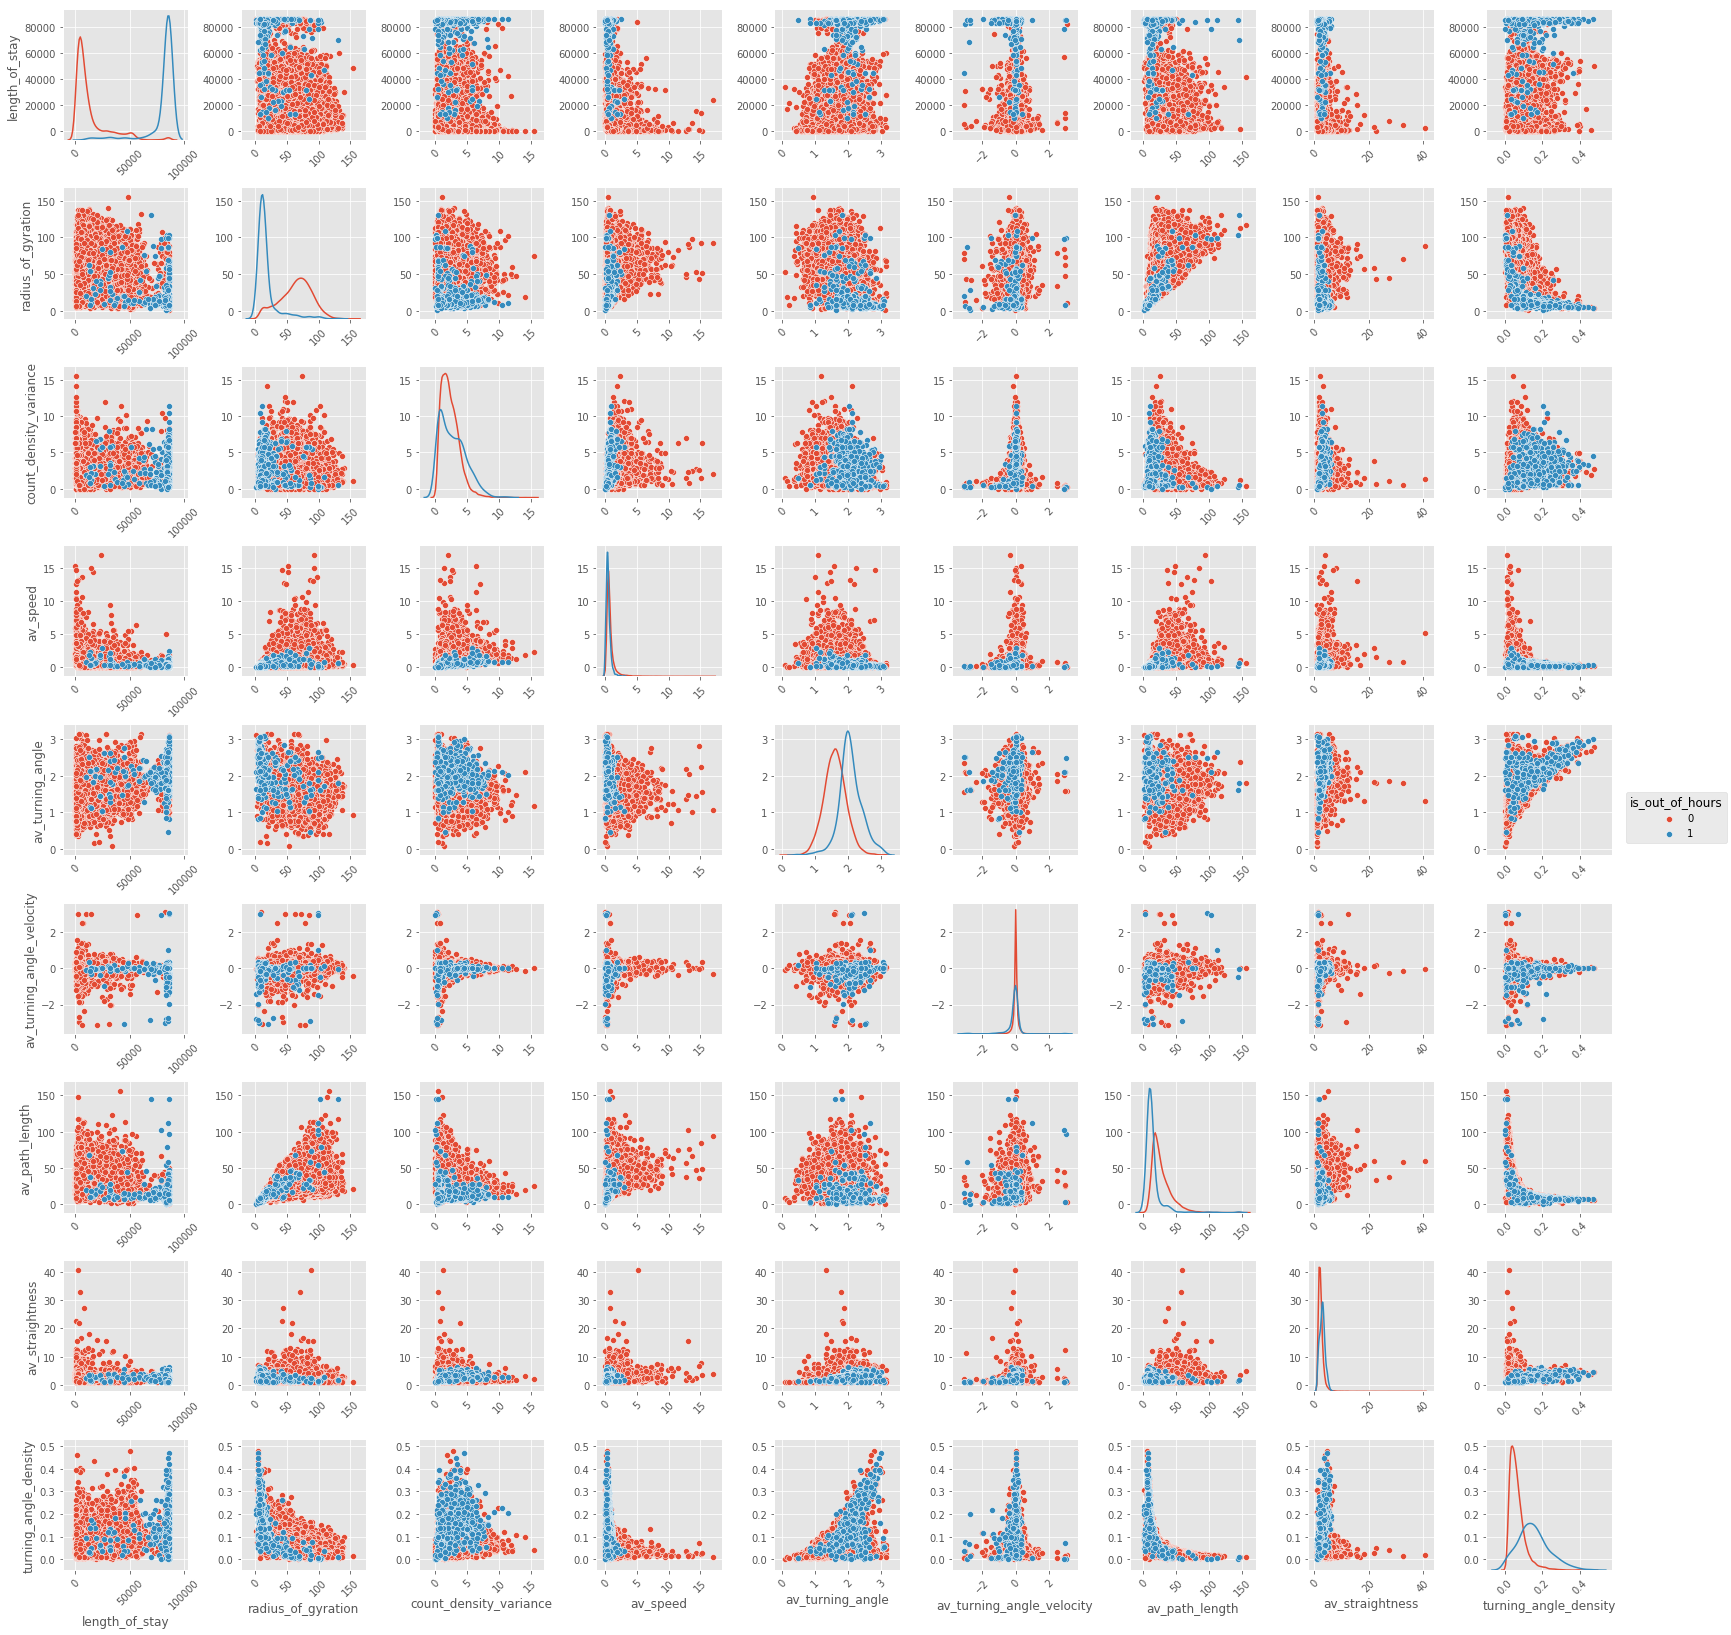

In [21]:
g = sns.pairplot(
    mac_address_clean_df, 
    vars=FEATURE_LIST,
    hue="is_out_of_hours", diag_kind="kde", dropna=True
)
 
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)

## Fitting distributions